# LSTM code in Tensorflow 2.0

Keras で ランダム系列の予測

In [0]:
from random import randint
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt

In [0]:
def generate_sequence(length, n_features):
    """長さがlengthで、ランダムな整数がn_featuresまでの系列を1つ生成する"""
    return [randint(0, n_features - 1) for _ in range(length)]

In [0]:
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return np.array(encoding)

def one_hot_decode(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

% sequence = generate_sequence(5, 10)
[4, 6, 1, 7, 3]

% encoded = one_hot_encode(sequence, 10)
[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]]

% decoded = one_hot_decode(encoded)
[4, 6, 1, 7, 3]

In [0]:
def generate_example(length, n_features, out_index):
    # 訓練データを1サンプル（1系列）だけ生成する
    sequence = generate_sequence(length, n_features)
    encoded = one_hot_encode(sequence, n_features)
    X = encoded.reshape((1, length, n_features))
    y = encoded[out_index].reshape(1, n_features)
    return X, y

% X, y = generate_example(5, 10, 2)
% print(X.shape, y.shape)
(1, 5, 10) (1, 10)
% print(X)
[[[0 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 1 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0]]]
% print(y)
[[0 0 0 0 0 1 0 0 0 0]]

In [0]:
length = 5
out_index = 2  # echo sequence predictionで入力の何番目の要素を返すか
n_features = 10
hidden_size = 25

model = Sequential()
model.add(LSTM(25, input_shape=(length, n_features)))
model.add(Dense(n_features, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                3600      
_________________________________________________________________
dense (Dense)                (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________


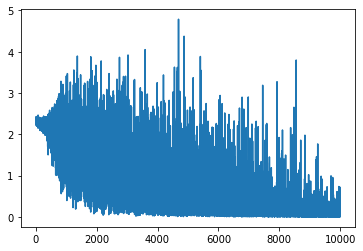

In [0]:
losses = []
for i in range(10000):
    X, y = generate_example(length, n_features, out_index)
    history = model.fit(X, y, epochs=1, verbose=0)
    losses.append(history.history['loss'][0])
plt.plot(losses)
plt.show()

In [0]:
# evaluate model
correct = 0
for i in range(100):
    X, y = generate_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct += 1
print('Accuracy: %f' % ((correct / 100) * 100.0))

Accuracy: 100.000000


In [0]:
# predict on new data
X, y = generate_example(length, n_features, out_index)
yhat = model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Sequence: [[2, 1, 7, 6, 5]]
Expected: [7]
Predicted: [7]


以上
